# MTH9879 Homework 10
#### Name: ShengQuan Zhou

Assigned: May 2, 2017.
Due: May 16, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## Numerical solution of Fredholm equation

### 1. (12 points)
Consider the Fredholm equation (7) in Lecture 10:

$$
\int_0^T{G}(|t-s|)\,dx_s =\text{const.}\qquad\text{for all $t\in [0,T]$.}
$$

Define $t_i:={i}\frac T{N}$. One way to discretize this integral equation is as follows:

$$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$

where $v_j=x_{t_{j}}-x_{t_{j-1}}$ and

<a name="eq:1"></a>(1)
$$
G_{ij}=
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

(a) Derive an explicit expression for the $G_{ij}$ in the case
$$
G(\tau)=\frac {1}{(1+\tau)^2}.
$$
You will need to compute separate expressions for the cases $i \neq j$ and $i=j$.

(b) With $N=512$, use matrix algebra to solve equation [(1)](#eq:1) numerically with this decay kernel.

(c) Plot your results - you should end up with something like Figure 2 of Lecture 10.



#### Solution (a):

Consider three cases:

**(1)** $i=j$
\begin{align}
G_{ij} &= \int_{t_{i-1}}^{t_i}\,\int_{t_{i-1}}^{t}\,\frac{1}{(1+t-s)^2}\,ds\,dt + \int_{t_{i-1}}^{t_i}\,\int_{t}^{t_i}\,\frac{1}{(1+s-t)^2}\,ds\,dt\\
&= 2(t_i-t_{i-1}) - 2\ln(1+t_i-t_{i-1})\\
&= \frac{2T}{N}-2\ln\left(1+\frac{T}{N}\right)\\
\end{align}

**(2)** $i<j$
\begin{align}
G _ {ij} &= \int _ {t _ {i-1}} ^{t_i}\,\int _ {t _ {j-1}}^{t_j}\,\frac{1}{(1+s-t)^2}\,ds\,dt \\
&= \ln\left(\frac{1+t _ {j-1}-t _ {i-1}}{1+t _ {j-1}-t_i} \cdot \frac{1+t_j-t_i}{1+t_j-t _ {i-1}} \right)\\
&= \ln\left[\frac{1+(j-i)\frac{T}{N}}{1+(j-i-1)\frac{T}{N}} \cdot \frac{1+(j-i)\frac{T}{N}}{1+(j-i+1)\frac{T}{N}} \right]\\
\end{align}

**(3)** $i>j$. By symmetry, $G_{ij} = G_{ji}$.

#### Solution (b):

In [35]:
getGMatrix <- function(N,T)
{
    G = matrix(0,N,N)
    t <- T/N
    for (i in 1:N) 
    {
        for (j in 1:N) 
        {
            if (i == j) 
            {
                G[i,j] = (2*t - 2*log(1 + t))
            } 
            else if (i > j) 
            {
                G[i,j] = (log((1+(i-j)*t)*(1+(i-j)*t) / ((1+(i-j-1)*t)*(1+(i-j+1)*t))))
            }
            else 
            {
                G[i,j] = (log((1+(j-i)*t)*(1+(j-i)*t) / ((1+(j-i-1)*t)*(1+(j-i+1)*t))))
            }  
        }
    }

    return(G)
}

# generating the constant vector 
N <- 512
const = rep(1e-6,N) ##this number can be changed
G = getGMatrix(N,1)
v = solve(G, const)
head(v)

[1]  0.1382490007 -0.0363389833  0.0104403132 -0.0020954072  0.0012622596
[6]  0.0003613259

#### Solution (c):

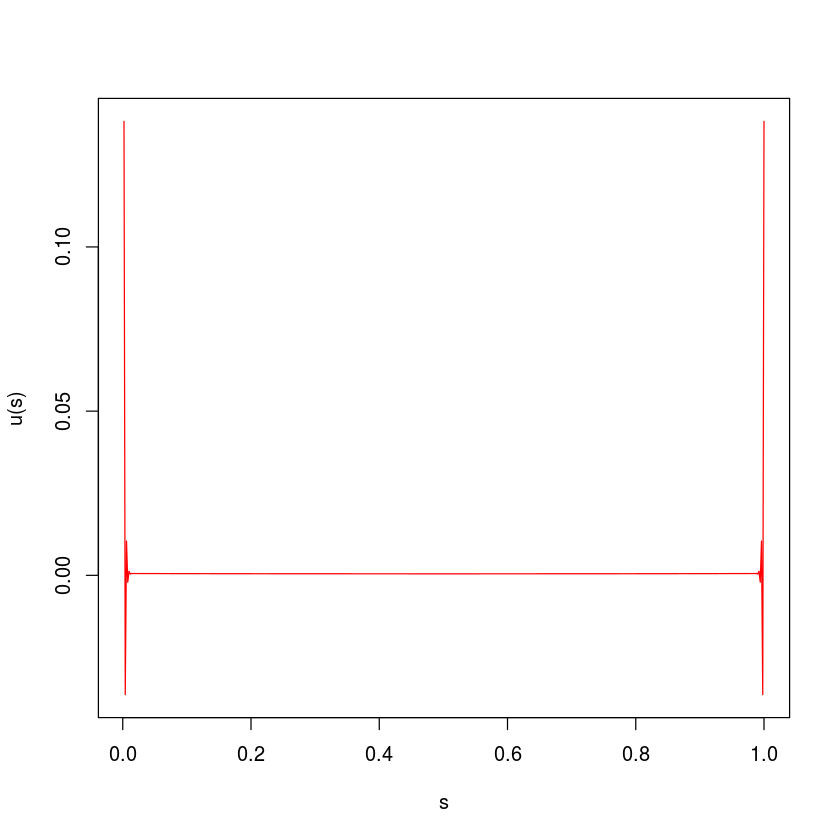

In [36]:
plot(seq(1/N, 1, 1/N), v, type = "l", col = "red", xlab = "s", ylab = "u(s)")

## Optimal interval VWAP strategy in the square-root model

### 2. (12 points)

Consider equation (11) of Lecture 10 for the cost of liquidation using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

(a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
h(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).

(b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.

(c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?

(d) Explain to your non-mathematical manager why this strategy has lower expected cost.

#### Solution (a):

For $i=j$,
$$
C_{jj}=\frac{x_j}{t_{j}-t_{j-1}}\,h(v_j)\,\int_{t_{j-1}}^{t_j}\,dt\,\int_{t_{j-1}}^{t_j}\,\frac{1}{\sqrt{t-s}}\,ds=
\frac{4}{3}\,x_j\,h(v_j)\,\sqrt{t_j-t_{j-1}} = \frac{\sigma}{\sqrt{V}} x_j^{3/2},
$$
where we have used $\dot{x}_j(t_{j}-t_{j-1})=x_j$ is the number of shares liquidated in the $j$th sub-interval.
Due to $x_1+x_2+x_3=X$,
\begin{align}
C _ {11}&= \frac{\sigma}{\sqrt{V}} x_1^{3/2}, \\
C _ {22}&= \frac{\sigma}{\sqrt{V}} x_2^{3/2}, \\
C _ {33}&= \frac{\sigma}{\sqrt{V}} (X-x_1-x_2)^{3/2}.
\end{align}
For $i\neq j$,
\begin{align}
C _ {ji}&=\frac{x_j}{t_{j}-t_{j-1}}\,h(v_i)\,\int _ {t _ {j-1}}^{t_j}\,dt\,\int _ {t _ {i-1}}^{t_i}\,\frac{1}{\sqrt{t-s}}\,ds\\
&=
\frac{4}{3}\,x_j\,h(v_i)\,\frac{\left(t _ {j}-t _ {i-1}\right)^{3/2}
-\left(t _ {j}-t _ {i}\right)^{3/2}
-\left(t _ {j-1}-t _ {i-1}\right)^{3/2}
+\left(t _ {j-1}-t _ {i}\right)^{3/2}
}{t _ {j}-t _ {j-1}}\\
&=
\frac{\sigma}{\sqrt{V}}x_j\sqrt{x_i}\,\frac{\left(t _ {j}-t _ {i-1}\right)^{3/2} - \left(t _ {j}-t _ {i}\right)^{3/2} - \left(t _ {j-1}-t _ {i-1}\right)^{3/2} + \left(t _ {j-1}-t _ {i}\right)^{3/2} }{(t _ {j}-t _ {j-1})\sqrt{t _ {i}-t _ {i-1}}}.
\end{align}
Thus,
\begin{align}
\therefore\,C _ {21}&=\frac{\sigma}{\sqrt{V}}x_2\sqrt{x_1}\,\frac{t _ {2}^{3/2} - \left(t _ {2}-t _ {1}\right)^{3/2} - t _ {1}^{3/2}  }{(t _ {2}-t _ {1})\sqrt{t _ {1}}}\\
C _ {31}&=\frac{\sigma}{\sqrt{V}}(X-x_1-x_2)\sqrt{x_1}\,\frac{T^{3/2} - \left(T-t _ {1}\right)^{3/2} - t _ {2}^{3/2}+\left(t _ {2}-t _ {1}\right)^{3/2}  }{(T-t _ {2})\sqrt{t _ {1}}}\\
C _ {32}&=\frac{\sigma}{\sqrt{V}}(X-x_1-x_2)\sqrt{x_2}\,\frac{\left(T-t _ {1}\right)^{3/2} - \left(T-t _ {2}\right)^{3/2} - \left(t _ {2}-t _ {1}\right)^{3/2}}{(T-t _ {2})\sqrt{t _ {2}-t _ {1}}}.
\end{align}


#### Solution (b):

For $t_1=T/3$, and $t_2=2 \,T/3$, express $C_{ij}$ in units of $\frac{\sigma}{\sqrt{V}}$:

\begin{align}
C _ {11} &= x_1^{3/2}, \\
C _ {21} &= (2\sqrt{2}-2)x_2\sqrt{x_1},\\
C _ {31} &= (3\sqrt{3}-4\sqrt{2}+1)\left(X-x_1-x_2\right)\sqrt{x_1},\\
C _ {22} &= x_2^{3/2}, \\
C _ {32} &= (2\sqrt{2}-2)\left(X-x_1-x_2\right)\sqrt{x_2},\\
C _ {33} &= \left(X-x_1-x_2\right)^{3/2}.
\end{align}

In [37]:
# choose X=1
cost <- function (x)
{
    x1 <- x[1]
    x2 <- x[2]
    c11 <- (x1)^1.5
    c22 <- (x2)^1.5
    c33 <- (1 - x1 - x2)^1.5
    c21 <- (2 * sqrt(2) - 2) * x2 * sqrt(x1)
    c32 <- (2 * sqrt(2) - 2) * (1 - x1 - x2) * sqrt(abs(x2))
    c31 <- (3 * sqrt(3) - 4 * sqrt(2) + 1 ) * (1 - x1 - x2) * sqrt(abs(x1))
    return (c11 + c22 + c33 + c21 + c32 + c31)
}

# Initialize x1=x2=x3=1/3
optim(c(1.0/3.0,1.0/3.0), cost)

$par
[1] 6.470814e-01 2.005129e-16

$value
[1] 0.8832821

$counts
function gradient 
     257       NA 

$convergence
[1] 0

$message
NULL


#### Solution (c):

Simple VWAP is defined as $x_1=X$ and $t_1=T$
$$\mathcal{C}_{VWAP}=\frac{\sigma}{\sqrt{V}}X^{3/2}.$$
Thus,
$$\frac{\mathcal{C}-\mathcal{C}_{VWAP}}{\mathcal{C}_{VWAP}}=\frac{0.883-1}{1}=-0.117=-11.7\%$$

So this strategy saves 11.7% compared to the VWAP.

#### Solution (d):

In VWAP, a continuous execution without any waiting takes in both instantaneous and accumulated market impact. On the other hand, in this 3-slice strategy, a decay of the accumulated market impact has occurred during the time gaps between slices, thus lowering the expected cost.
